# Using Machine Learning Tools Assignment 1

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of predicting bike rental demand. A data set has been provided containing records of bike rentals in Seoul, collected during 2017-18.

The main aims of the prac are: 

- to practice using tools for loading and viewing data sets;
- to visualise data in several ways and check for common pitfalls;
- to plan a simple experiment and prepare the data accordingly;
- to run your experiment and to report and interpret your results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task. Note that some questions require writing a small amount of code, some require graphical results, and some require comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (with the correct results displayed) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code is written to run correctly on the original data file.

When creating graphical output, label is clearly, with appropriate titles, xlabels and ylabels, as appropriate.

Most of the tasks in this assignment only require writing a few lines of code! One goal of the assignment is explore [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), [matplotlib](https://matplotlib.org/stable/index.html) and other libraries you will find useful throughout the course, so feel free to use the functions they provide. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

Chapter 2 of the reference book is based on a similar workflow to this prac, so you may look there for some further background and ideas. You can also use any other general resources on the internet that are relevant although do not use ones which directly relate to these questions with this dataset (which would normally only be found in someone else's assignment answers). If you take a large portion of code or text from the internet then you should reference where this was taken from, but we do not expect any references for small pieces of code, such as from documentation, blogs or tutorials. Taking, and adapting, small portions of code is expected and is common practice when solving real problems.

The following code imports some of the essential libraries that you will need. You should not need to modify it, but you are expected to import other libraries as needed.


In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
assert pd.__version__ >= "1.0"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Step 1: Loading and initial processing of the dataset (20%)

Download the data set from MyUni using the link provided on the assignment page. A paper that describes one related version of this dataset is: Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020. Feel free to look at this if you want more information about the dataset.

The data is stored in a CSV (comma separated variable) file and contains the following information 

 - Date: year-month-day
 - Rented Bike Count: Count of bikes rented at each hour
 - Hour: Hour of the day
 - Temperature: Temperature in Celsius
 - Humidity: %
 - Windspeed: m/s
 - Visibility: 10m
 - Dew point temperature: Celsius
 - Solar radiation: MJ/m2
 - Rainfall: mm
 - Snowfall: cm
 - Seasons: Winter, Spring, Summer, Autumn
 - Holiday: Holiday/No holiday
 - Functional Day: NoFunc(Non Functional Hours), Fun(Functional hours)

**Load the data set from the csv file into a DataFrame, and summarise it with at least two appropriate pandas functions.**

In [2]:
### Your code here
rental_bikes = pd.read_csv("SeoulBikeData.csv")
rental_bikes.info()
rental_bikes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature (C)            8760 non-null   float64
 4   Humidity (%)               8760 non-null   int64  
 5   Wind speed (m/s)           8759 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature (C)  8759 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8758 non-null   object 
 10  Snowfall (cm)              8760 non-null   object 
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,Winter,No Holiday,Yes


### 1.2 Initial visualisation

To get a feeling for the data it is a good idea to do some form of simple visualisation.  **Display a set of histograms for the features** as they are right now, prior to any cleaning steps.

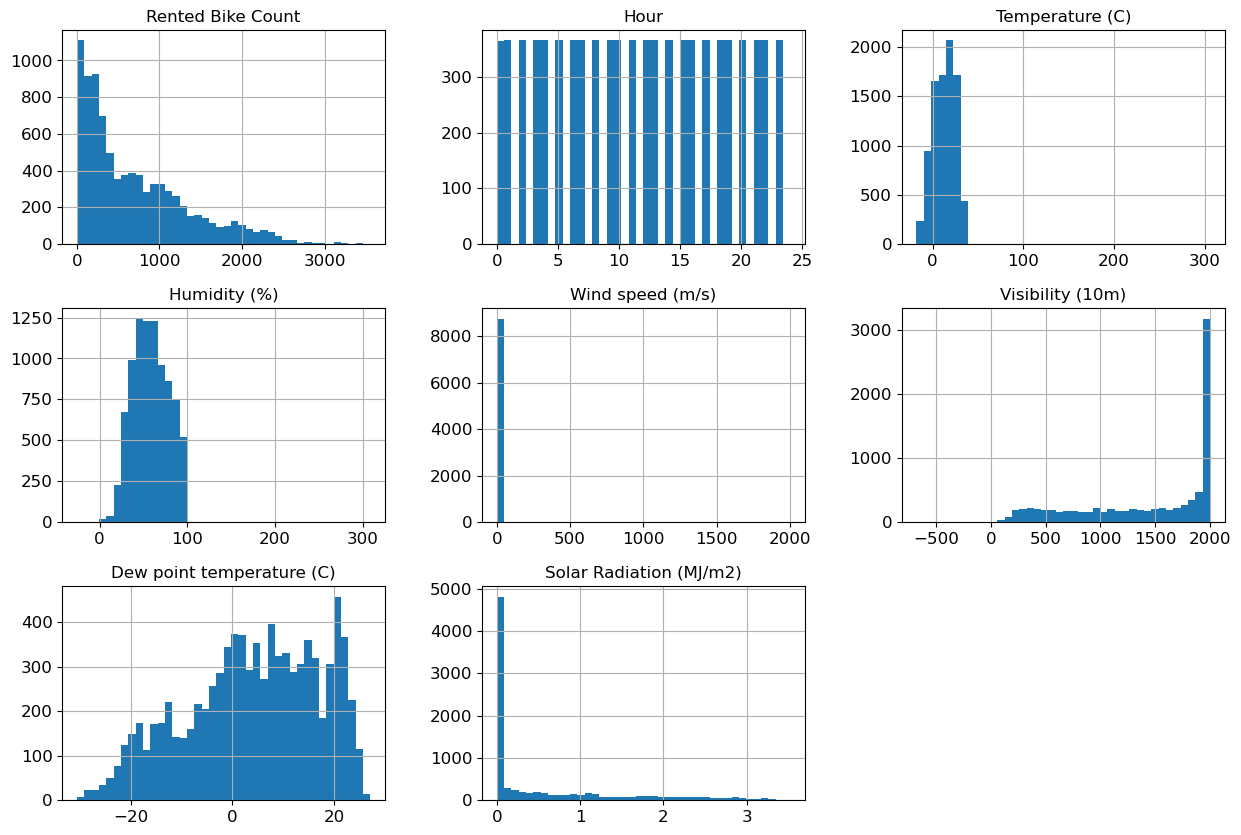

In [3]:
### Your code here
initial_visualisation = rental_bikes.hist(bins= 40, figsize=(15, 10))


### 1.3 Removing unwanted information

The "Functioning day" feature records whether the bike rental was open for business on that day. For this assignment we are only interested in predicting demand on days when the business is open, so **remove rows from the DataFrame where the business is closed.** Hint: you can use the `DataFrame.loc()` function to do this. As a sanity check, ensure that the rows you are removing contain zero bike rentals! **After doing this, delete the Functioning Day feature from the DataFrame** and verify that this worked.

In [4]:
### Your code here
rental_bikes = rental_bikes.loc[rental_bikes['Rented Bike Count'] != 0]
rental_bikes.drop(columns=['Functioning Day'],inplace=True)

### 1.4 Numerical encoding

The main task is to predict future bike rental demand from this data. Hence the target feature is "Bike Rental Count". You will use regression techniques to do this, but this requires that the other features are numerical.

The Holiday and Season features both need to be converted to a simple numerical format. **Write code to convert the Holiday feature to 0 or 1 from its current format.** 

In [5]:
### Your code here
rental_bikes["Holiday"] = rental_bikes["Holiday"].replace(['No Holiday','Holiday'],[0,1])

The Season feature is a little tricker. A number could be assigned to each season, but a better solution in this case is to **add 4 new columns**, each labelled by a season, and each storing 0 or 1 according to the season in each row. In other words, the "Winter" column contains 1 whenever the season is winter, and 0 elsewhere. **Do this for each season. Afterwards, remember to delete the Season feature.**

In [6]:
### Your code here
rental_bikes_onehot_seasons = pd.get_dummies(rental_bikes["Seasons"], columns=["Seasons"], prefix='Seasons')
rental_bikes.drop('Seasons', axis=1, inplace=True)
rental_bikes = pd.concat([rental_bikes, rental_bikes_onehot_seasons], axis=1)
rental_bikes

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,0,0,0,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,0,0,0,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,0,0,0,0,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,0,0,0,0,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0,0,0,1,0,0,0
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0,0,0,1,0,0,0
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0,0,0,1,0,0,0
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0,0,0,1,0,0,0


It is known that bike rentals depend strongly on whether it's a weekday or a weekend. **Replace the Date feature with a Weekday feature that stores 0 or 1 depending on whether the date represents a weekend or weekday.**  To do this, use the function `date_is_weekday` below, which returns 1 if it is a weekday and 0 if it is a weekend.

**Apply the function to the Date column in your DataFrame** (you can use `DataFrame.transform` to apply it).

In [7]:
import datetime
def date_is_weekday(datestring):
    ### return 0 if weekend, 1 if weekday
    dsplit = datestring.split('/')
    wday = datetime.datetime(int(dsplit[2]),int(dsplit[1]),int(dsplit[0])).weekday()
    return int(wday<=4)

### Your code to apply the function here:
rental_bikes["Date"] = rental_bikes["Date"].transform(date_is_weekday) 
rental_bikes = rental_bikes.rename(columns = {"Date": "Weekday"})
rental_bikes

,Weekday,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,1,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,0,0,0,0,1
1,1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,0,0,0,0,1
2,1,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,0,0,0,0,1
3,1,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,0,0,0,0,1
4,1,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1,1003,19,4.2,34,2.6,1894,-10.3,0.0,0,0,0,1,0,0,0
8756,1,764,20,3.4,37,2.3,2000,-9.9,0.0,0,0,0,1,0,0,0
8757,1,694,21,2.6,39,0.3,1968,-9.9,0.0,0,0,0,1,0,0,0
8758,1,712,22,2.1,41,1.0,1859,-9.8,0.0,0,0,0,1,0,0,0


**Convert all the remaining data to numerical format**, with any non-numerical entries set to NaN.

In [8]:
### Your code here
rental_bikes = rental_bikes.apply(pd.to_numeric, errors="coerce")
rental_bikes

,Weekday,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,1,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1
1,1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1
2,1,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,0,1
3,1,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1
4,1,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1,0,0,0
8756,1,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1,0,0,0
8757,1,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1,0,0,0
8758,1,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1,0,0,0


## Step 2: Visualise the data and perform further processing (20%)

### 2.1 Visualisation

Use **at least two graphical methods to display your data** and **identify** problematic entries. **Write one sentence** that summarises what you found about problematic entries.

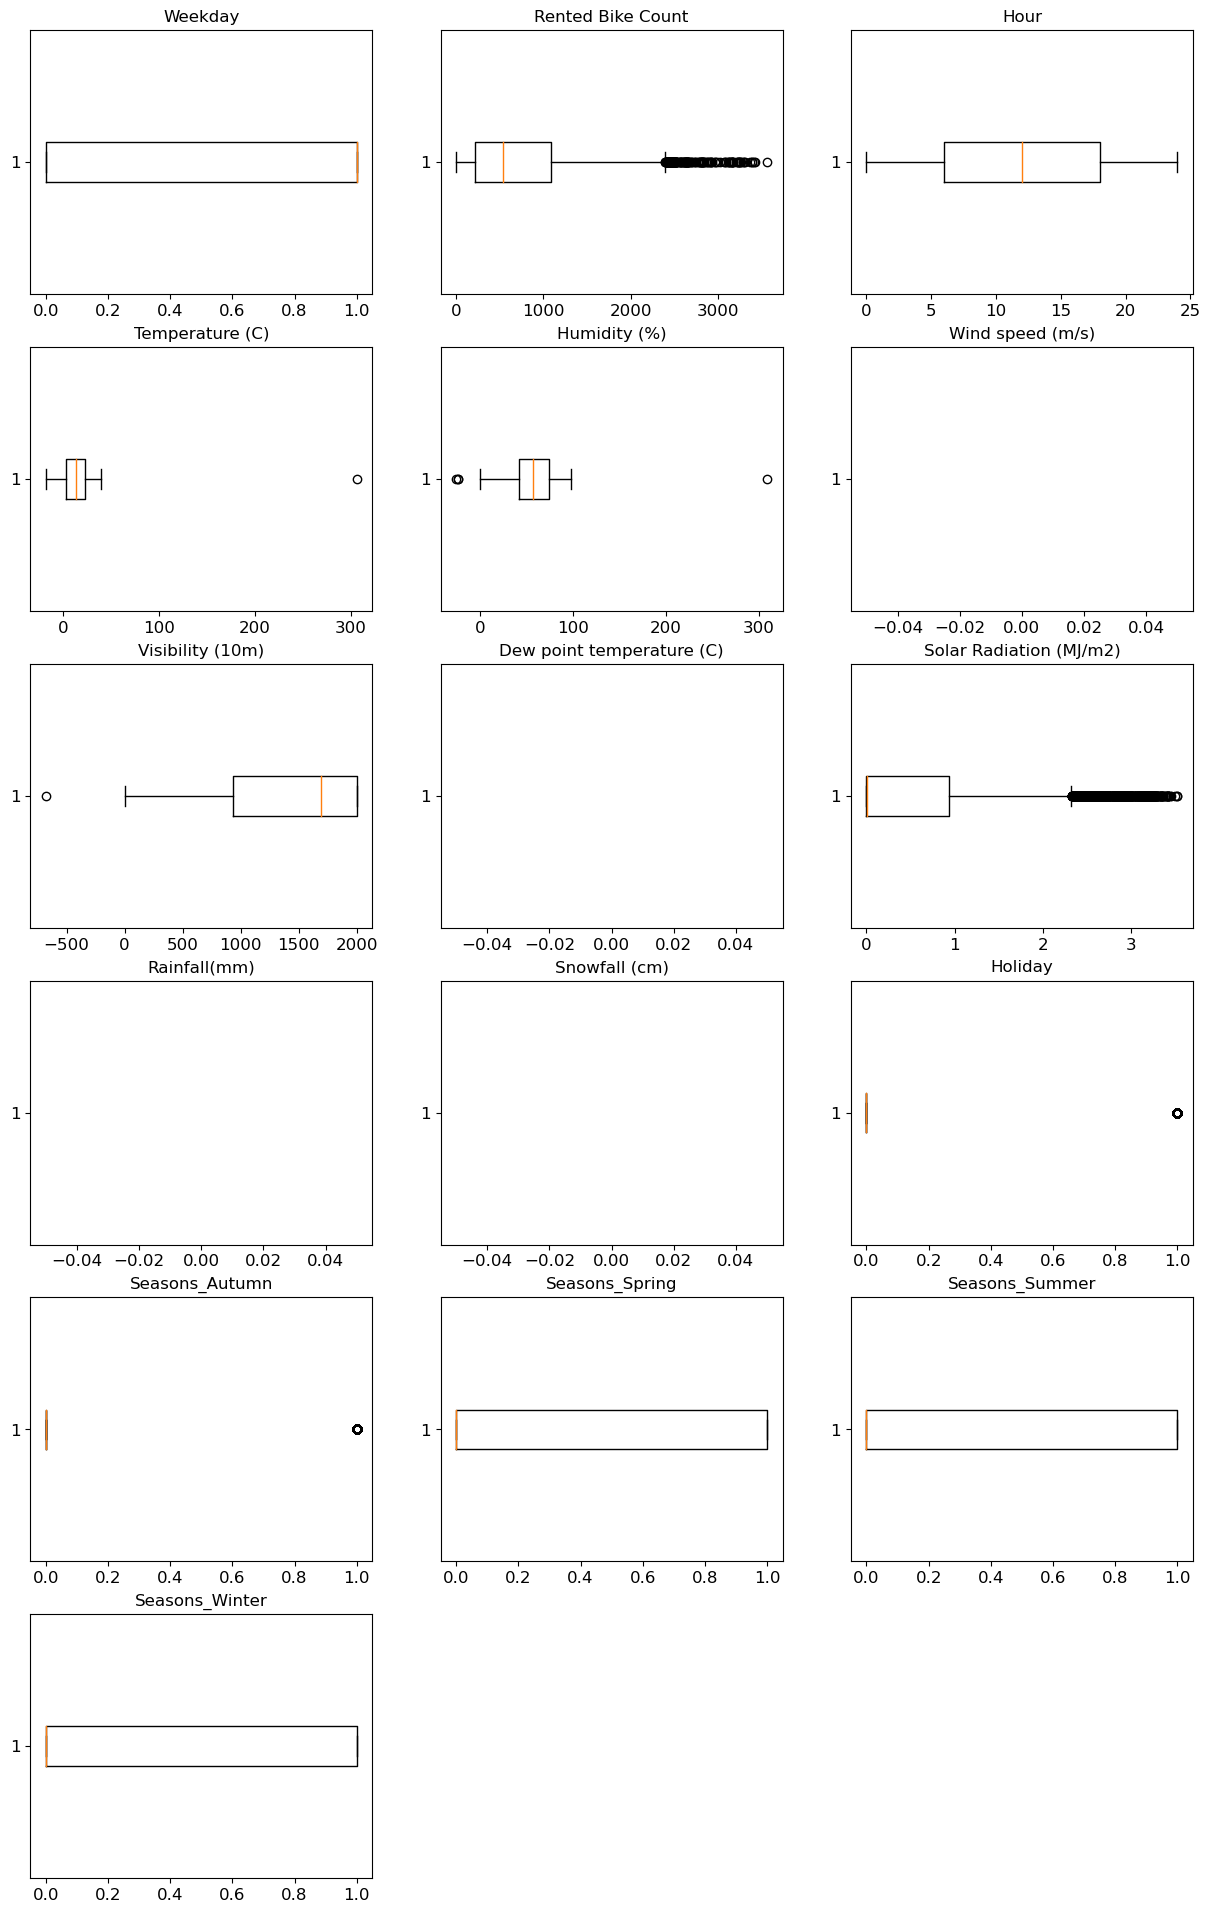

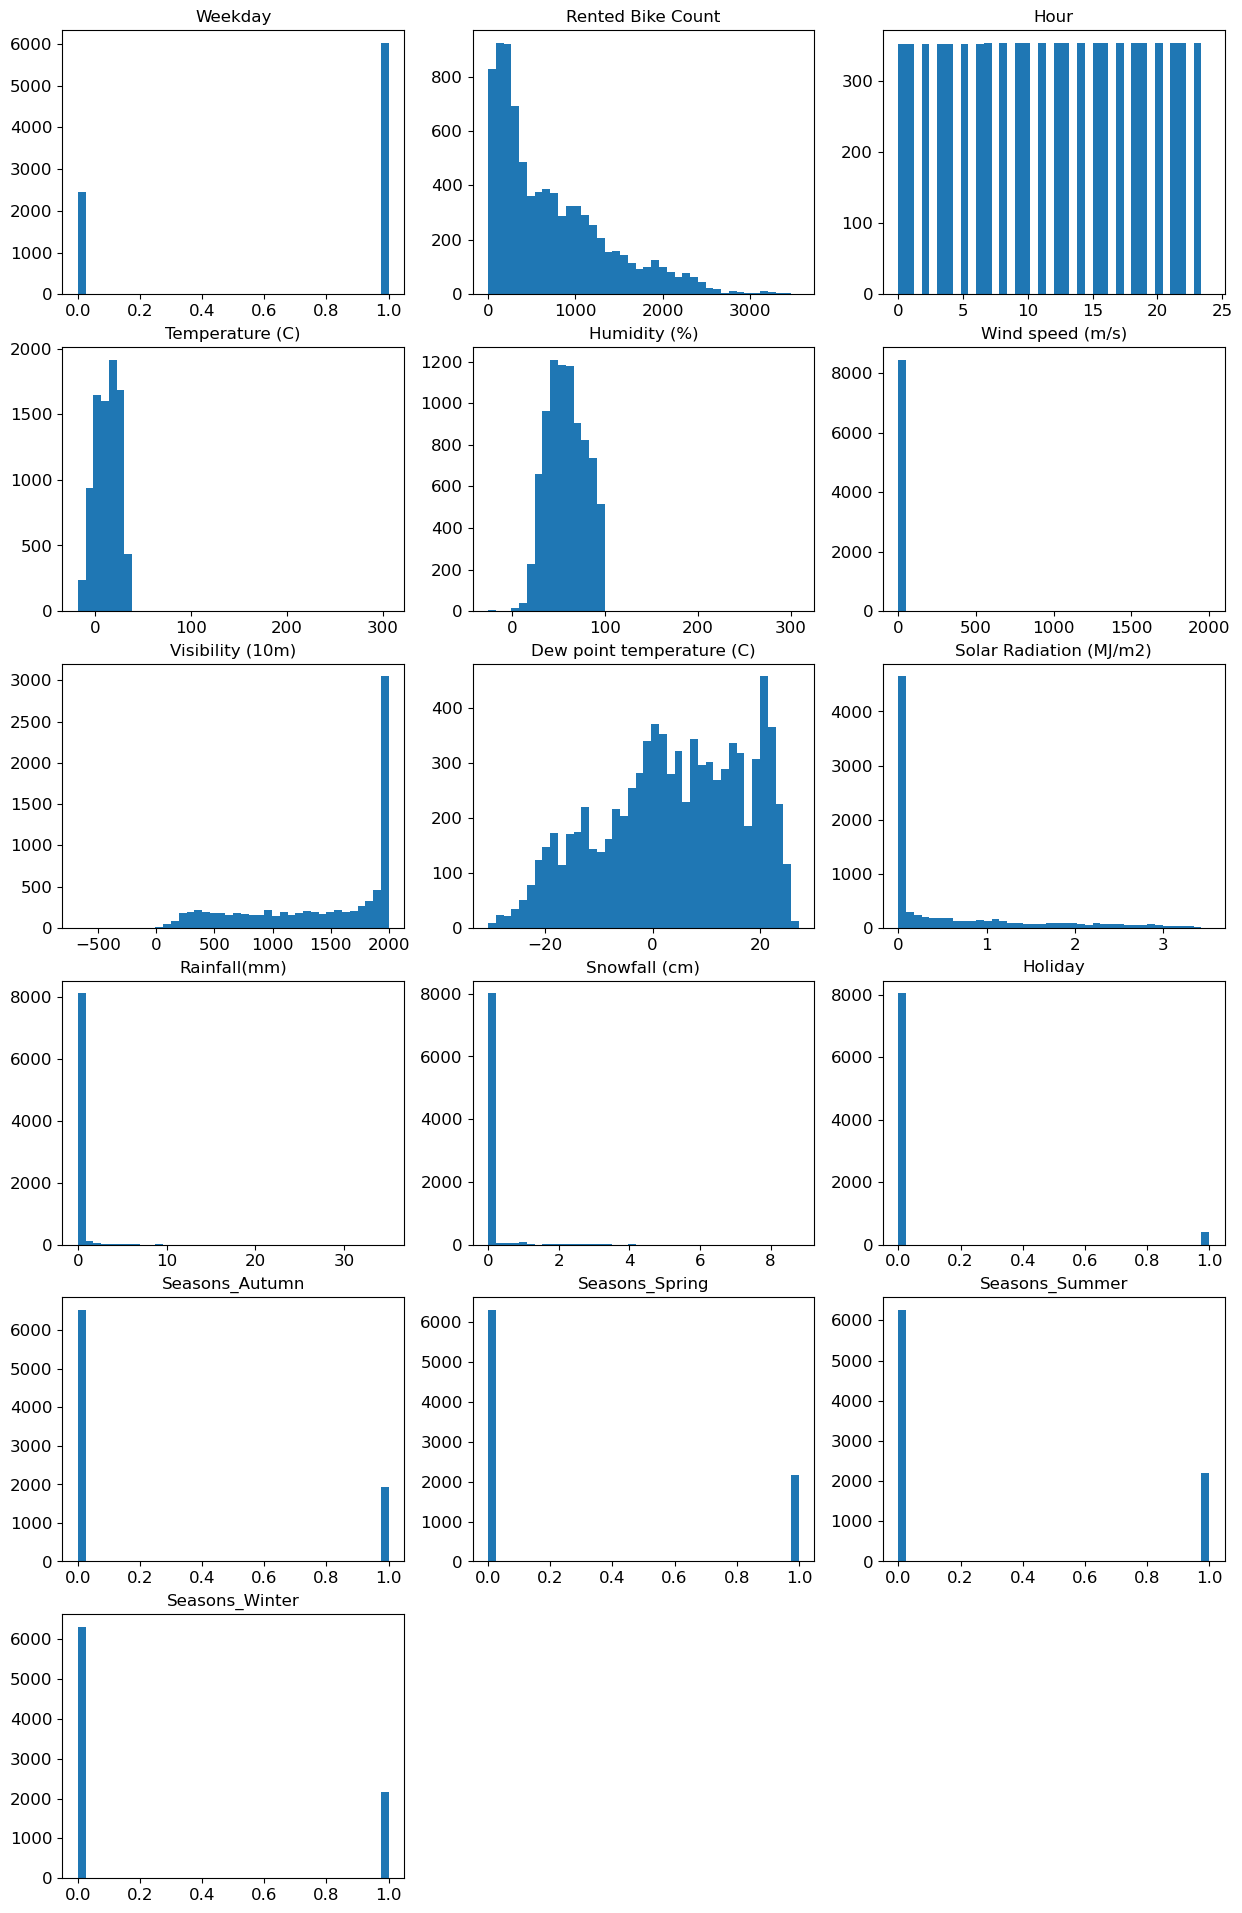

In [9]:
### Your code here
plt.figure(figsize=(15, 24))
nfeat = rental_bikes.shape[1]
ncol = 3
nrow = int(np.ceil(nfeat/ncol))
for n in range(nfeat):
  plt.subplot(nrow,ncol,n+1)
  plt.boxplot(rental_bikes.iloc[:,n], vert=False)
  plt.title(f'{rental_bikes.columns[n]}')

plt.figure(figsize=(15, 24))
nfeat = rental_bikes.shape[1]
ncol = 3
nrow = int(np.ceil(nfeat/ncol))
for n in range(nfeat):
    plt.subplot(nrow,ncol,n+1)
    plt.hist(rental_bikes.iloc[:,n],bins=40)
    plt.title(f'{rental_bikes.columns[n]}')

plt.show()

### Your summary sentence about problematic entries

<b> As you can see in the above subplots, we can see almost entries are close to normal distributions. However, when we see: </b>

    - In Boxplox, here are some outliers in some entries: Temperature, Humidity, Visibility, WindSpeed. Also, when see in the Histogram Temperature, Humidity, Hour have not normal distributions -> We will get rid of outliers and replace.
    - In Boxplot, there are some nan values in some entries: SnowFall, RainFall, WindSpeed -> We will replace.


### 2.2 Imputation and Pre-Processing

**Set any problematic values** in the numerical data to `np.nan` and check that this has worked. Once this is done, specify a **sklearn *pipeline* that will perform imputation** to replace problematic entries (nan values) with an appropriate **median** value ***and* any other pre-processing** that you think should be used. Just specify the pipeline - do ***not*** run it now.

In [10]:
### Your code here
rental_bikes.loc[rental_bikes['Temperature (C)'] > 300,'Temperature (C)'] = np.nan
rental_bikes.loc[(rental_bikes['Humidity (%)'] > 300) | (rental_bikes['Humidity (%)'] < 0 ),'Humidity (%)'] = np.nan
rental_bikes.loc[rental_bikes['Visibility (10m)'] < 0,'Visibility (10m)'] = np.nan
rental_bikes.loc[rental_bikes['Hour'] > 23,'Hour'] = np.nan
rental_bikes.loc[rental_bikes['Wind speed (m/s)'] >= 2000,'Wind speed (m/s)'] = np.nan

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# imputer to replace nan values to median value
# std_scaler to set input numerical attributes to not different scales

pipeline = Pipeline([("imputer",SimpleImputer(missing_values=np.nan, strategy='median')),
                     ('std_scaler',StandardScaler())])

### 2.3 Correlation 

It is also useful to look at how strongly correlated the features are to the desired target (Rented Bike Count). Before anything else is done it is necessary to **fit and apply the pipeline** above to make a *temporary* version of the whole dataset that is pre-processed. **Why is it important to not use this version of the pre-processed data again?**

In [11]:
### Your code here
rental_bikes_copy  = rental_bikes.copy()

### Your written answer here
If reusing the same pre-processed data multiple times, it can create an unrealistic view of how the model will perform on new, unseen data. Also, it is difficult to reproduce and validate the results. It will maintain the integrity and reliability of your results, ensuring that your the model's performance is evaluated on unseen data and providing a more accurate estimation of its real-world performance.

To visualise the strength of the relationships, display a **scatter plot** for each feature (separately) vs the target variable.  Also **calculate the correlation** of each feature with the target (Hint: pandas function `corr()` or numpy `corrcoef()`). **Which 3 attributes are the most correlated with bike rentals?**

Rented Bike Count            1.000000
Temperature (C)              0.562774
Hour                         0.425436
Dew point temperature (C)    0.400248
Seasons_Summer               0.282001
Solar Radiation (MJ/m2)      0.273862
Visibility (10m)             0.210968
Seasons_Autumn               0.165333
Wind speed (m/s)             0.125295
Weekday                      0.046360
Seasons_Spring               0.015580
Holiday                     -0.070070
Rainfall(mm)                -0.129170
Snowfall (cm)               -0.152261
Humidity (%)                -0.201755
Seasons_Winter              -0.458920
Name: Rented Bike Count, dtype: float64

<Figure size 1500x1500 with 0 Axes>

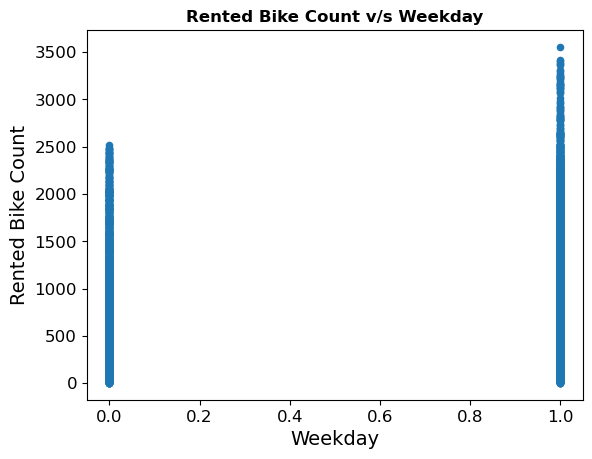

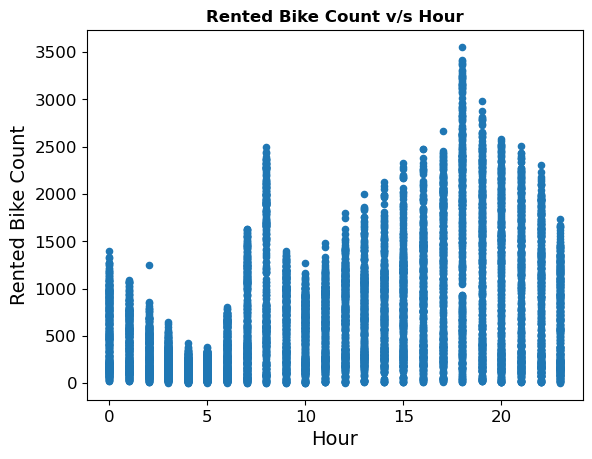

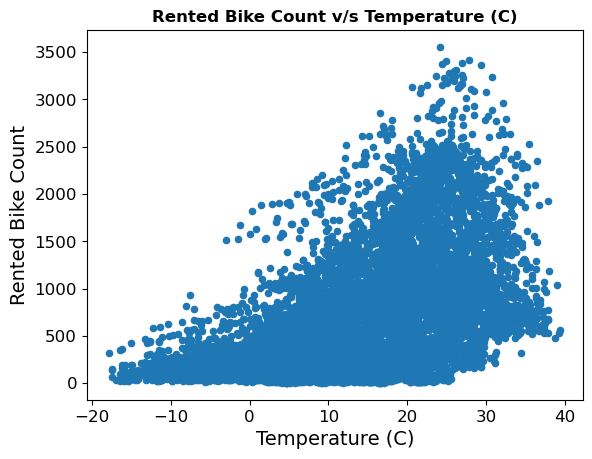

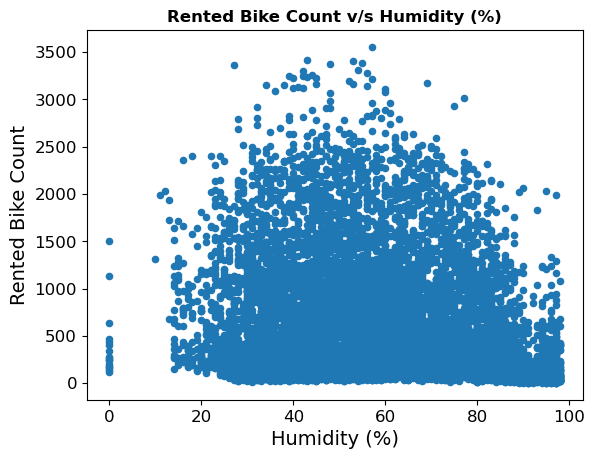

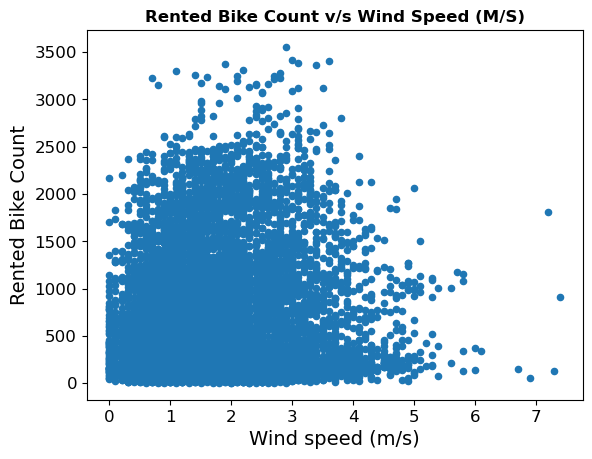

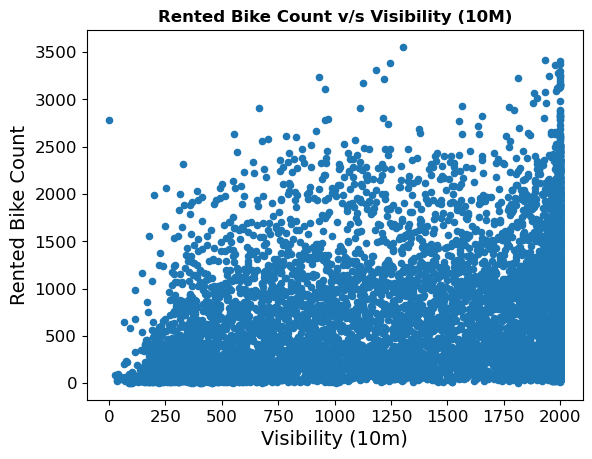

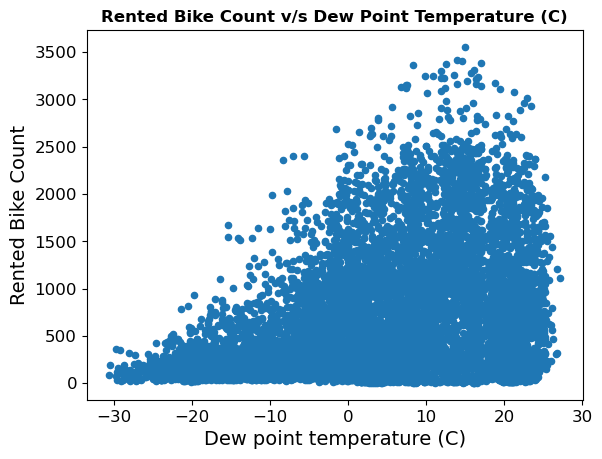

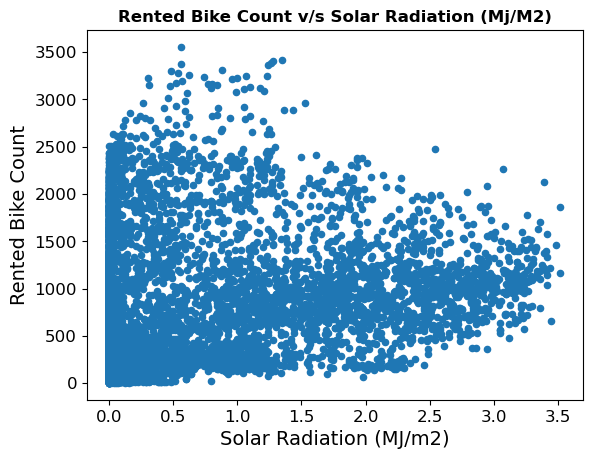

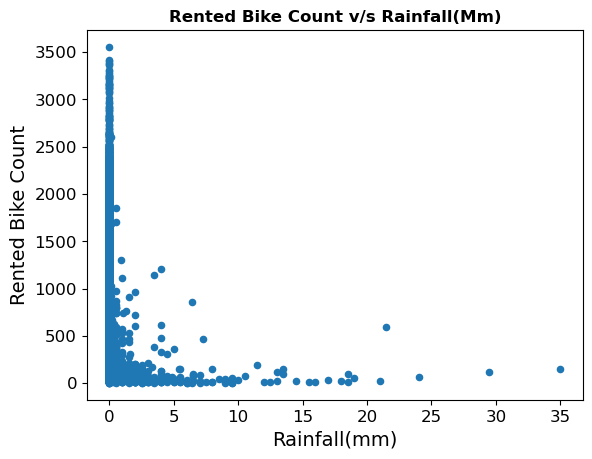

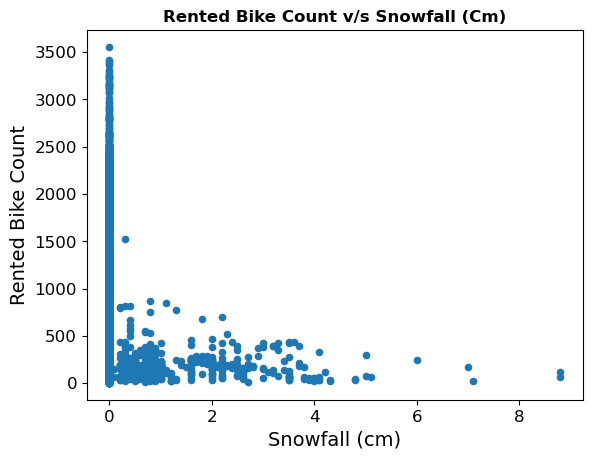

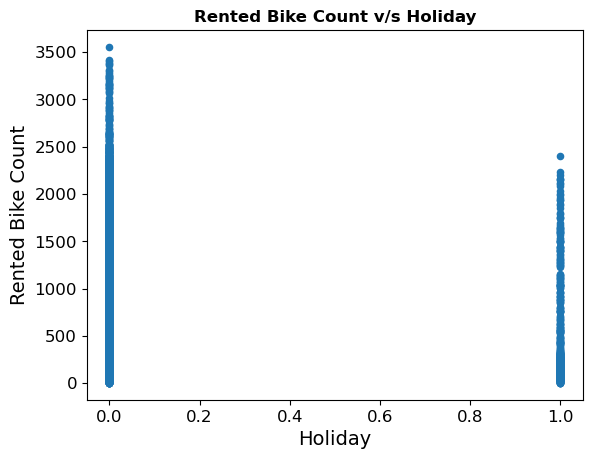

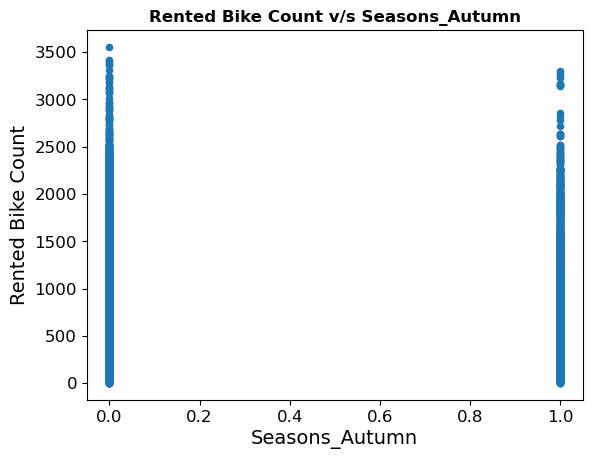

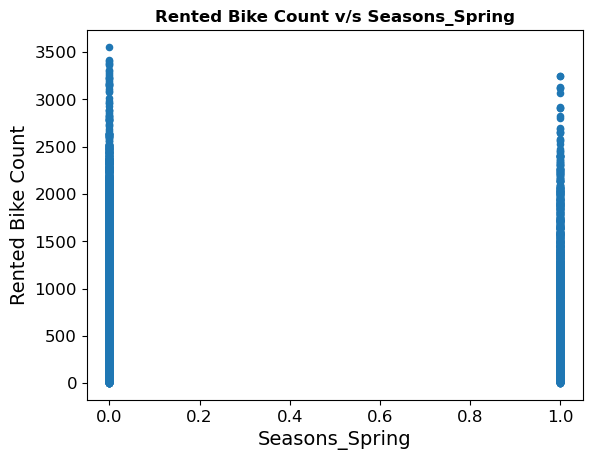

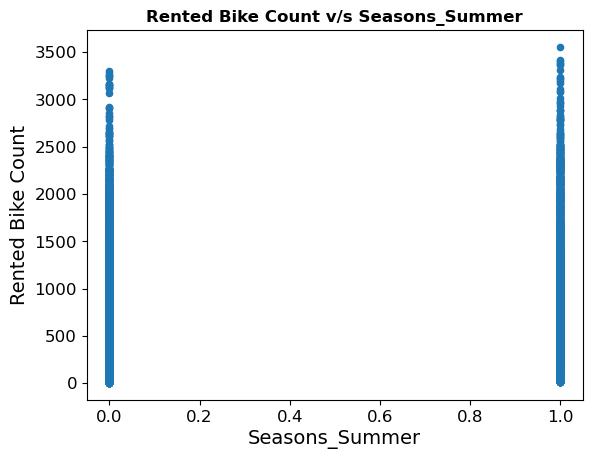

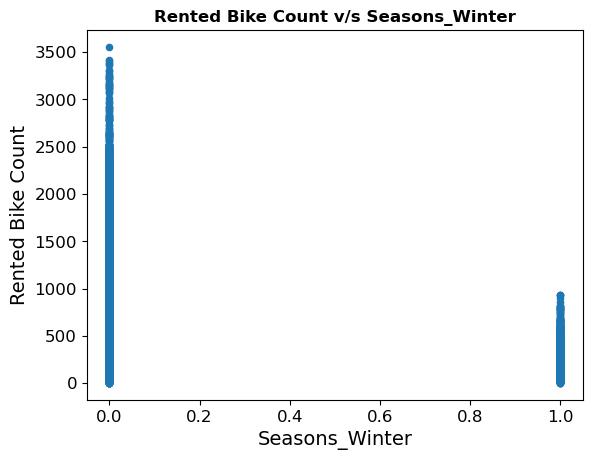

In [12]:
### Your code here
independent_variables = [i for i in rental_bikes_copy.columns if i not in ['Rented Bike Count']]

plt.figure(figsize=(15,15))
for column in independent_variables:
  rental_bikes_copy.plot(kind = 'scatter', x = column, y ='Rented Bike Count')
  plt.title(f'Rented Bike Count v/s {column.title()}',weight='bold')

corr_matrix  = rental_bikes_copy.corr()
corr_matrix["Rented Bike Count"].sort_values(ascending=False)

### Your written answers here
3 attributes are the most correlated with bike rentals:
- Temperature (C) with correrlation 0.562774
- Hour with correrlation 0.425436
- ew point temperature (C) with correrlation 0.400248


## Step 3: Predicting bike rentals (25%)

A regression approach will be used for this problem: that is, "bike rentals" will be treated as a real number whose value will be predicted. If necessary, it could be rounded to the nearest integer afterwards, but this will not be necessary here. The root mean squared error (rmse) metric will be used to quantify performance.  

**Split the data** appropriately so that 20% of it will be kept as a hold-out test set. **Build a pipeline** starting with the one specified in section 2.2 above, and now include a ***linear regression* model**. After you've done this, **fit** this to your training data for a quick test. To get an idea of how successful this model is, **calculate the rmse of the fit to the training data**. To act as a simple baseline for comparison, **also calculate the rmse** that you would get if all the predictions were equal to the **mean of the training targets** (i.e. bike rentals).


In [13]:
### Your code here
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


X = rental_bikes_copy.drop(["Rented Bike Count"], axis=1) 
y = rental_bikes_copy["Rented Bike Count"].copy() 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

pipeline_full = make_pipeline(pipeline, LinearRegression())

pipeline_full.fit(X_train, y_train)

y_train_pred_linear = pipeline_full.predict(X_train)

rmse_train_linear = np.sqrt(mean_squared_error(y_train, y_train_pred_linear))

print("RMSE of training set by Linear Regression model: ",rmse_train_linear)

RMSE of training set by Linear Regression model:  435.4421706729055


Show an appropriate **visualisation of the fit for your linear regression.**

Text(0, 0.5, 'Actual')

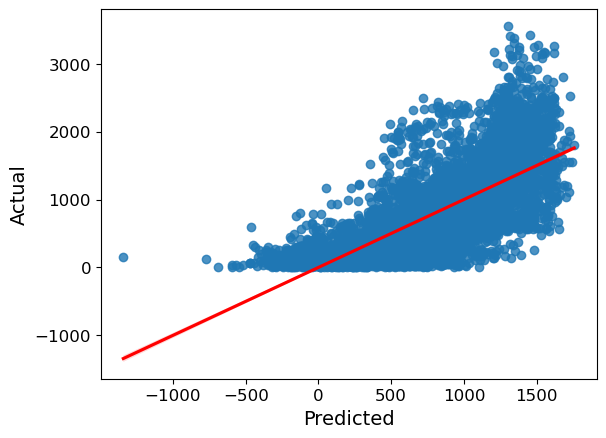

In [14]:
### Your code here
import seaborn as sns
sns.regplot(x=y_train_pred_linear, y=y_train, line_kws={'color':'red'})
plt.xlabel('Predicted')
plt.ylabel('Actual')

Now two other, different regression models (that you probably won't be familiar with) will be fit and later these will be compared to find the best one.

The second model to fit is ***Kernel Ridge*** regression (`from sklearn.kernel_ridge import KernelRidge`). **Build a pipeline using this and fit it to your training data**, using the default settings. Again, **plot the fit and display the rmse for the training dataset.**

RMSE of training set by Kernel Ridge model:  849.2328568312729


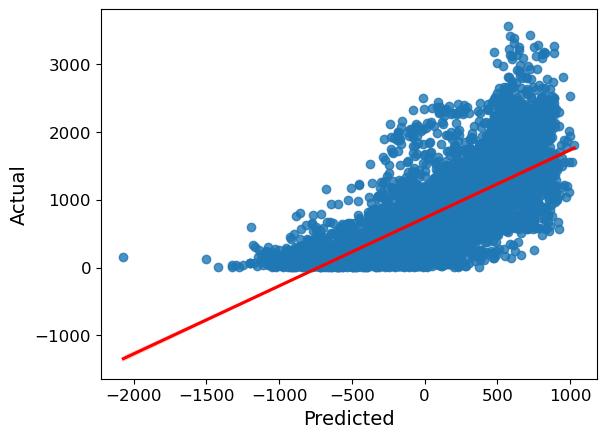

In [15]:
### Your code here
from sklearn.kernel_ridge import KernelRidge

pipeline_full_kernel = make_pipeline(pipeline, KernelRidge())

pipeline_full_kernel.fit(X_train, y_train)

y_train_pred_kernel = pipeline_full_kernel.predict(X_train)

rmse_train_kernel = np.sqrt(mean_squared_error(y_train, y_train_pred_kernel))


import seaborn as sns
sns.regplot(x=y_train_pred_kernel, y=y_train, line_kws={'color':'red'})
plt.xlabel('Predicted')
plt.ylabel('Actual')

print("RMSE of training set by Kernel Ridge model: ",rmse_train_kernel)


The third, and most powerful model, is ***Support Vector Regression*** (`from sklearn.svm import SVR`). **Build a pipeline using this and fit it to your training data**, using the default settings. Again, **plot the fit and display the rmse for the training dataset.**

RMSE of training set by SVR model:  532.4614908505077


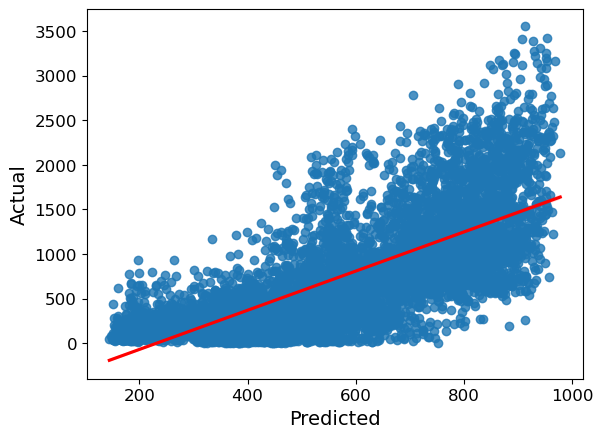

In [16]:
### Your code here
from sklearn.svm import SVR

pipeline_full_SVR = make_pipeline(pipeline, SVR())

pipeline_full_SVR.fit(X_train, y_train)

y_train_pred_srv = pipeline_full_SVR.predict(X_train)

rmse_train_srv = np.sqrt(mean_squared_error(y_train, y_train_pred_srv))

import seaborn as sns
sns.regplot(x=y_train_pred_srv, y=y_train, line_kws={'color':'red'})
plt.xlabel('Predicted')
plt.ylabel('Actual')


print("RMSE of training set by SVR model: ",rmse_train_srv) 

## Step 4: Cross validation (20%)

**Perform a *10 fold cross validation* for each model.** This splits the training set (that we've used above) into 10 equal size subsets, and uses each in turn as the validation set while training a model with the other 9. You should therefore have 10 rmse values for each cross validation run.

**Display the mean and standard deviation of the rmse values** obtained for each model **for the validation splits** using the same settings/parameters for the models as used above. **Also display the mean and standard deviation** of the rmse values obtained for the **training data splits**.

In [17]:
### Your code here
from sklearn.model_selection import cross_val_score

cv_scores_lr = cross_val_score(pipeline_full, X_train, y_train, cv=10,scoring= 'neg_root_mean_squared_error')
cv_scores_kr = cross_val_score(pipeline_full_kernel, X_train, y_train, cv=10,scoring= 'neg_root_mean_squared_error')
cv_scores_svr = cross_val_score(pipeline_full_SVR, X_train, y_train, cv=10,scoring= 'neg_root_mean_squared_error')

#Linear Regresstion RMSE of training set: 435.4421706729055
print("Linear Regression scores: " , cv_scores_lr)
print("Linear Regression mean: " , -cv_scores_lr.mean())
print("Linear Regression Standard Deviation: " , cv_scores_lr.std())
print("============================================================")

#Kernel Ridge RMSE of training set: 849.2328568312734
print("Kernel Ridge scores: ", cv_scores_kr)
print("Kernel Ridge mean: ", -cv_scores_kr.mean())
print("Kernel Ridge Standard Deviation: ", cv_scores_kr.std())
print("============================================================")


#Support Vector Regression  RMSE of training set: 532.4614908505077
print("Support Vector Regression scores: ", cv_scores_svr)
print("Support Vector Regression mean: ", -cv_scores_svr.mean())
print("Support Vector Regression Standard Deviation: ", cv_scores_svr.std())

Linear Regression scores:  [-452.14601524 -426.13073742 -423.30049818 -451.86490639 -441.96180017
 -461.67480481 -450.06887212 -424.68013909 -428.00199543 -402.48281369]
Linear Regression mean:  436.2312582552219
Linear Regression Standard Deviation:  17.258953855297893
Kernel Ridge scores:  [-838.15161423 -856.30162504 -856.95737908 -860.37552582 -845.34608609
 -862.72584795 -849.83030451 -842.63774697 -852.8226418  -833.02194636]
Kernel Ridge mean:  849.817071786546
Kernel Ridge Standard Deviation:  9.326714615031868
Support Vector Regression scores:  [-528.59661967 -535.13955173 -552.27702631 -567.79589617 -536.94115603
 -570.78501137 -553.71184786 -520.63021721 -533.05135265 -505.57731644]
Support Vector Regression mean:  540.450599544957
Support Vector Regression Standard Deviation:  19.566423823090975


On the basis of the results you found above, would you say that any of the models were **under-fitting or over-fitting**?  

**Which method do you think is the best** out of these three?

### Your answer here
- The Support Vector Regression, Kernel Ridge models may have over-fitting because when comparing the mean rmse of cross validation  with rmse of traning set which is large or equal.
- The  Linear Regression model may have  under-fitting because it have a little gap between the mean rmse of cross validation and rmse of traning set.
- The best of these three is Linear Regression model.

## Step 5: Grid parameter search (15%)

Both the Kernel Ridge Regression and Support Vector Regression have hyperparameters that can be adjusted to suit the problem. **Choose either the KernelRidge or SVR** (your choice entirely), and use grid search to systematically compare the generalisation performance (rmse) obtained with different hyperparameter settings (still with 10-fold CV). Use the sklearn function `GridSearchCV` to do this. 

For KernelRidge, vary the hyperparameter `alpha`.

For SVR, vary the hyperparameter `C`.

**Print out the hyperparameter setting** for the best (i.e. chosen) method. 

Finally, **train and apply your chosen method**, with appropriate hyperparameter settings, to the ***test set* and report the performance**. 

In [18]:
### Your code here
from sklearn.model_selection import GridSearchCV
parameters_kr   = {'kernelridge__alpha': [300, 600, 900]}


# Create our GridSearchCV model
clf_kr = GridSearchCV(pipeline_full_kernel, parameters_kr, cv = 10,scoring= 'neg_root_mean_squared_error', return_train_score=True)

# Train our GridSearch
clf_kr.fit(X_train, y_train)

pipeline_full_kernel.set_params(**clf_kr.best_params_)

# Predict in test
prediction_test_kr = pipeline_full_kernel.predict(X_test)

cv_scores_kr_test = cross_val_score(pipeline_full_kernel, X_test, y_test, cv=10,scoring= 'neg_root_mean_squared_error')

print("Kernel Ridge test mean for validation cross: ", -cv_scores_kr_test.mean())

print("Kernel Ridge test best scores after training GridSearch: ",-clf_kr.best_score_)

Kernel Ridge test mean for validation cross:  848.0968855440608
Kernel Ridge test best scores after training GridSearch:  850.1227122516873


**How different was the test set performance to the validation performance, and is this suggestive of over-fitting, under-fitting or neither?**

### Your answers here
- Different of the test set performance and the validation performance: is approximately similar, but when validation cross is smaller than use best scores in GridSearch.
- It cannot have enough information to conclude over-fitting or under-fitting